# Zadanie: pozostałe metryki
Policz pozostałe metryki dla tego modelu, zrób wizualizacyjną ocenę i następnie porównaj ostatni model z pierwszym, który stworzyliśmy.
Link do swojego Notebooka w GitHubie prześlij swojemu Mentorowi.

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler

In [19]:
bike_data_raw = pd.read_csv('daily-bike-share.csv')
bike_data_raw
bike_data_raw['dteday'] = pd.to_datetime(bike_data_raw['dteday'])
bike_data = bike_data_raw.copy()
bike_data.drop(['instant', 'dteday', 'yr'], axis=1, inplace=True)
bike_data['difference_temp'] = (bike_data['atemp'] - bike_data['temp'])/bike_data['temp']
bike_data.drop(['atemp'], axis=1, inplace=True)
numeric_features = ['temp', 'difference_temp', 'hum', 'windspeed']
categorical_features = ['season','mnth','holiday','weekday','workingday','weathersit']
target = 'rentals'
cv = KFold(n_splits=5, shuffle=False)

In [20]:
# Importujemy regresję liniową z regularyzacją Lasso
from sklearn.linear_model import Lasso

In [21]:
# Podział na zmienne objaśniające i zmienną objaśnianą
X = bike_data[numeric_features+categorical_features].copy()
y = bike_data[target].copy()

# Podział na zbiór treningowy i testowy (taki sam podział co poprzednio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
numeric_transformer = Pipeline(steps=[('logtransformer', PowerTransformer()), ('standardscaler', StandardScaler()), ('polynomialfeatures', PolynomialFeatures())])
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])
preprocessor = ColumnTransformer(
    transformers=[('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Tworzenie końcowego Pipeline, który będziemy trenować
final_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('regressor', Lasso())])
params = {'preprocessor__num__polynomialfeatures__degree': [1,2,3,4,5],
          'regressor__alpha':[1e-5,1e-4,1e-3,1e-2,1e-1,0.0,1.0,10.0, 100.0]}
final_polynomial_regression_gridsearch = GridSearchCV(final_pipeline, params, 
            scoring='neg_mean_squared_error', cv=cv)
final_polynomial_regression_gridsearch.fit(X_train, y_train)
print("\nNajlepsze hiperparametry:", final_polynomial_regression_gridsearch.best_params_, "\n")
final_polynomial_regression_model = final_polynomial_regression_gridsearch.best_estimator_
predictions = final_polynomial_regression_model.predict(X_test)
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, predictions))}')

c:\Users\magda\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.566e+06, tolerance: 2.207e+04
  model = cd_fast.enet_coordinate_descent(
c:\Users\magda\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.620e+06, tolerance: 2.268e+04
  model = cd_fast.enet_coordinate_descent(
c:\Users\magda\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca


Najlepsze hiperparametry: {'preprocessor__num__polynomialfeatures__degree': 1, 'regressor__alpha': 10.0} 

RMSE: 506.8802692134751


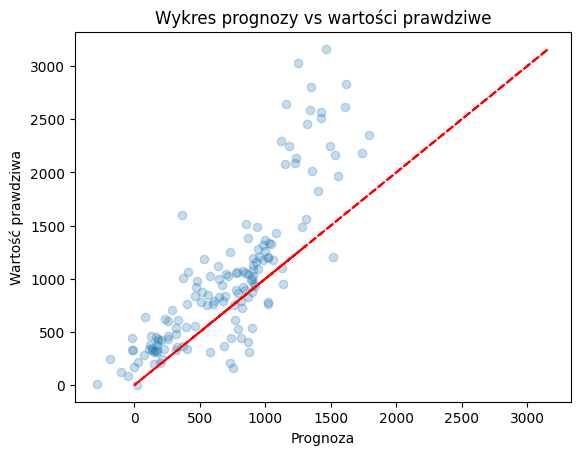

In [22]:
plt.scatter(predictions, y_test, alpha=0.25)
plt.xlabel('Prognoza')
plt.ylabel('Wartość prawdziwa')
plt.title('Wykres prognozy vs wartości prawdziwe', fontsize=12)
plt.plot(y_test, y_test, color="r", linestyle="--")
plt.show()

In [23]:
# Importujemy regresję liniową z regularyzacją Ridge
from sklearn.linear_model import Ridge

In [24]:
# Podział na zmienne objaśniające i zmienną objaśnianą
X = bike_data[numeric_features+categorical_features].copy()
y = bike_data[target].copy()

# Podział na zbiór treningowy i testowy (taki sam podział co poprzednio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
numeric_transformer = Pipeline(steps=[('logtransformer', PowerTransformer()), ('standardscaler', StandardScaler()), ('polynomialfeatures', PolynomialFeatures())])
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])
preprocessor = ColumnTransformer(
    transformers=[('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Tworzenie końcowego Pipeline, który będziemy trenować
final_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('regressor', Ridge())])
params = {'preprocessor__num__polynomialfeatures__degree': [1,2,3,4,5],
          'regressor__alpha':[1e-5,1e-4,1e-3,1e-2,1e-1,0.0,1.0,10.0, 100.0]}
final_polynomial_regression_gridsearch = GridSearchCV(final_pipeline, params, 
            scoring='neg_mean_squared_error', cv=cv)
final_polynomial_regression_gridsearch.fit(X_train, y_train)
print("\nNajlepsze hiperparametry:", final_polynomial_regression_gridsearch.best_params_, "\n")
final_polynomial_regression_model = final_polynomial_regression_gridsearch.best_estimator_
predictions = final_polynomial_regression_model.predict(X_test)
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, predictions))}')


Najlepsze hiperparametry: {'preprocessor__num__polynomialfeatures__degree': 1, 'regressor__alpha': 10.0} 

RMSE: 473.16295909948184


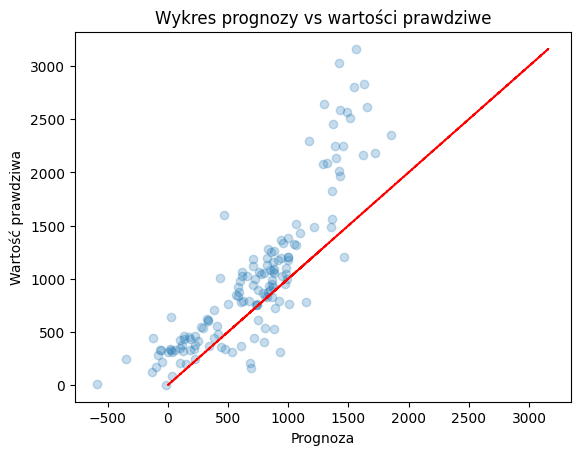

In [25]:
plt.scatter(predictions, y_test, alpha=0.25)
plt.xlabel('Prognoza')
plt.ylabel('Wartość prawdziwa')
plt.title('Wykres prognozy vs wartości prawdziwe', fontsize=12)
plt.plot(y_test, y_test, color="r", linestyle="--")
plt.show()

Najlepsze wyniki dla zbiorów walidacyjnych uzyskaliśmy dla wielomianu stopnia 1. 
W przypadku metryki Lasso tzw. regularyzacją L1, mniej znaczace cechy mają wewnętrzne wagi zmniejszone do zera, czyli W OGÓLE nie wpływają one na decyzyjność modelu. Natomiast wynik jest słabszy niż w przypadku ElasticNet, nasz model myli się więcej razy.
Metryka Ridge tzw. regularyzacją L2, wypadła najlepiej dla naszego zbioru. Podobnie jak Lasso, powoduje iż mniej znaczące cechy ulegają pomniejszeniu, lecz nie do zera, ale do wartości bliskiej zeru, czyli cecha ta posiada MINIMUM. Poprawiliśmy wynik w stosunku do metryki ElaskicNet i nasz model myli się już tylko 473 razy.